In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2022)

In [29]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc,out_file='tree.dot',
    feature_names=iris.feature_names,class_names=iris.target_names,
    filled = True, impurity=True
)

In [ ]:
import graphviz
with open('tree.dot') as file:
  dot_graph = file.read()

graphviz.Source(dot_graph)

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

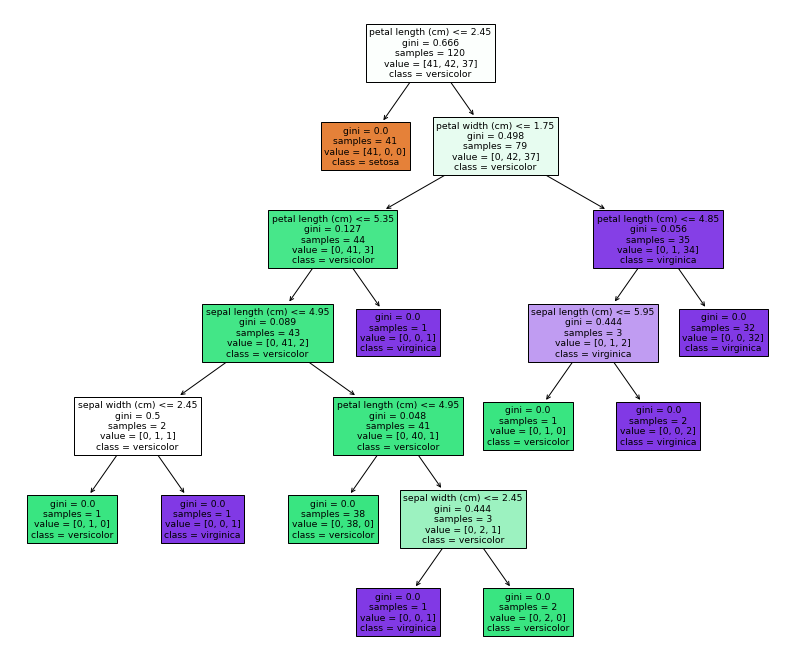

In [33]:
plt.figure(figsize=(14,12))
plot_tree(dtc,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

제약조건 max_depth=3

In [20]:
dtc2 = DecisionTreeClassifier(max_depth=3,random_state=156)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc2,out_file='tree_max_depth.dot',
    feature_names=iris.feature_names,class_names=iris.target_names,
    filled = True, impurity=True
)

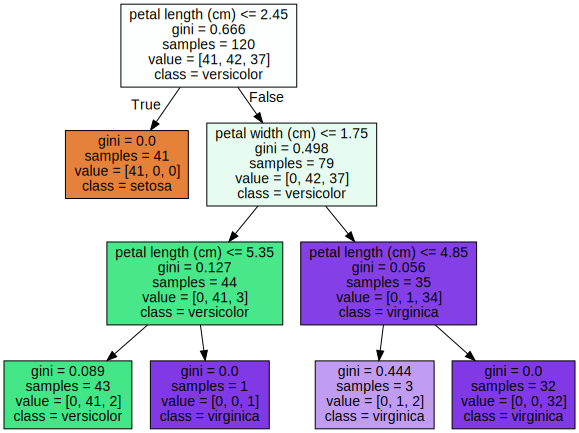

In [22]:
import graphviz
with open('tree_max_depth.dot') as file:
  dot_graph = file.read()

graphviz.Source(dot_graph)

min_samples_split = 4 

In [23]:
dtc3 = DecisionTreeClassifier(min_samples_split=4,random_state=156)
dtc3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc3,out_file='tree_min_samples_split.dot',
    feature_names=iris.feature_names,class_names=iris.target_names,
    filled = True, impurity=True
)

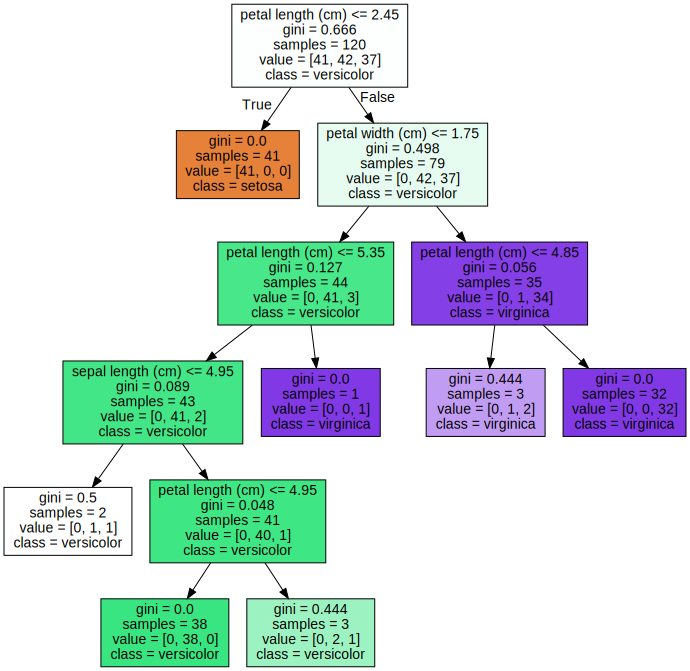

In [25]:
import graphviz
with open('tree_min_samples_split.dot') as file:
  dot_graph = file.read()

graphviz.Source(dot_graph)

min_samples_leaf =2 

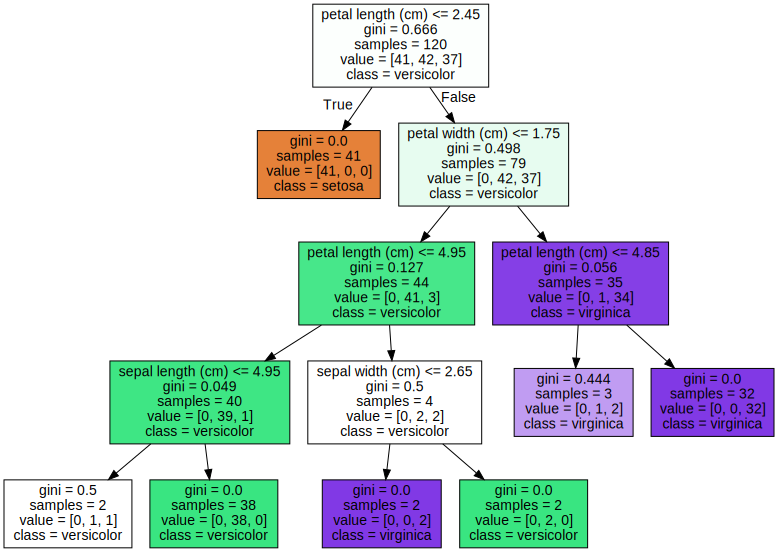

In [26]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=2,random_state=156)
dtc4.fit(X_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(
    dtc4,out_file='tree_min_samples_leaf.dot',
    feature_names=iris.feature_names,class_names=iris.target_names,
    filled = True, impurity=True
)

import graphviz
with open('tree_min_samples_leaf.dot') as file:
  dot_graph = file.read()

graphviz.Source(dot_graph)

* 모델 비교

In [35]:
dtc.score(X_test,y_test), dtc2.score(X_test,y_test), dtc3.score(X_test,y_test), dtc4.score(X_test,y_test), 

(0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333)

* 학습된 모델이 제공하는 정보
 - Feature importance

In [34]:
dtc.feature_importances_

array([0.02749093, 0.02920926, 0.54511905, 0.39818075])

In [36]:
dtc2.feature_importances_

array([0.        , 0.        , 0.57439539, 0.42560461])

In [38]:
dtc3.feature_importances_

array([0.01131949, 0.        , 0.57134389, 0.41733662])

In [39]:
dtc4.feature_importances_

array([0.01225016, 0.02578981, 0.55179876, 0.41016126])

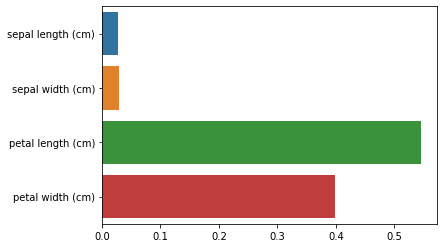

In [40]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_,y=iris.feature_names)
plt.show()